In [32]:
# Install dplyr
#install.packages("dplyr")

# Install sqldf
#install.packages("sqldf")

# Install ggplot2
#install.packages("ggplot2")

# Install reshape2
#install.packages("reshape2")

# Install gridExtra
#install.packages("gridExtra")


In [163]:
library(dplyr)
library(sqldf)
library(ggplot2)
library(reshape2)
library(gridExtra)
df<-read.csv('/kaggle/input/adultdataset/adult.csv')
summary(df)

      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:32561       Min.   :  12285   Length:32561      
 1st Qu.:28.00   Class :character   1st Qu.: 117827   Class :character  
 Median :37.00   Mode  :character   Median : 178356   Mode  :character  
 Mean   :38.58                      Mean   : 189778                     
 3rd Qu.:48.00                      3rd Qu.: 237051                     
 Max.   :90.00                      Max.   :1484705                     
 education.num   marital.status      occupation        relationship      
 Min.   : 1.00   Length:32561       Length:32561       Length:32561      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

In [164]:
missing_values <- colSums(is.na(df))

print(missing_values)

           age      workclass         fnlwgt      education  education.num 
             0              0              0              0              0 
marital.status     occupation   relationship           race            sex 
             0              0              0              0              0 
  capital.gain   capital.loss hours.per.week native.country         income 
             0              0              0              0              0 


In [165]:
df$income<-ifelse(df$income=='>50K',1,0)

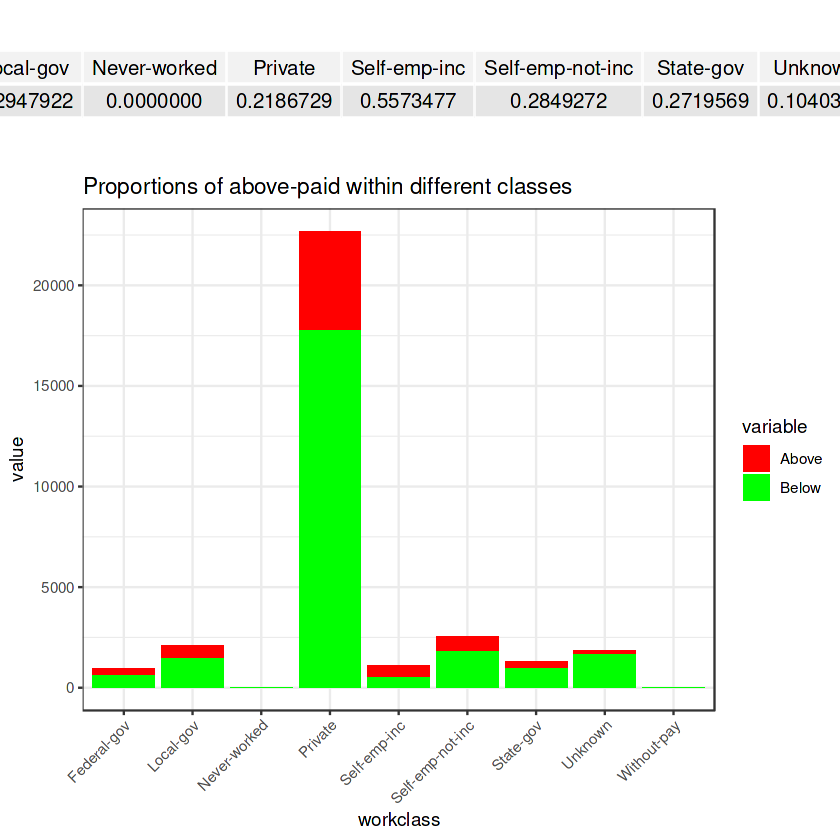

In [166]:
df$workclass<-ifelse(df$workclass=='?','Unknown',as.character(df$workclass))
Work_class<-sqldf('SELECT workclass, count(workclass) as Count 
                  ,sum(income) as Above from df group by workclass')
table<-data.frame(Class=Work_class$workclass, Proportion=Work_class$Above/Work_class$Count)
Work_class$Below<-Work_class$Count-Work_class$Above
Work_class<-Work_class[,c(1,3,4)]
Workclass<-melt(Work_class,id.vars = 'workclass')
gg<-ggplot(Workclass,aes(x=workclass,y=value,fill=variable))+geom_bar(stat = 'identity',position = 'stack')+theme_bw()+scale_fill_manual(values = c('red','green'))+theme(axis.text.x = element_text(angle = 45, hjust = 1))+ggtitle('Proportions of above-paid within different classes')
tbl <- tableGrob(t(table), rows=NULL)
grid.arrange(tbl, gg,
             nrow=2,
             as.table=TRUE,
             heights=c(1,4))

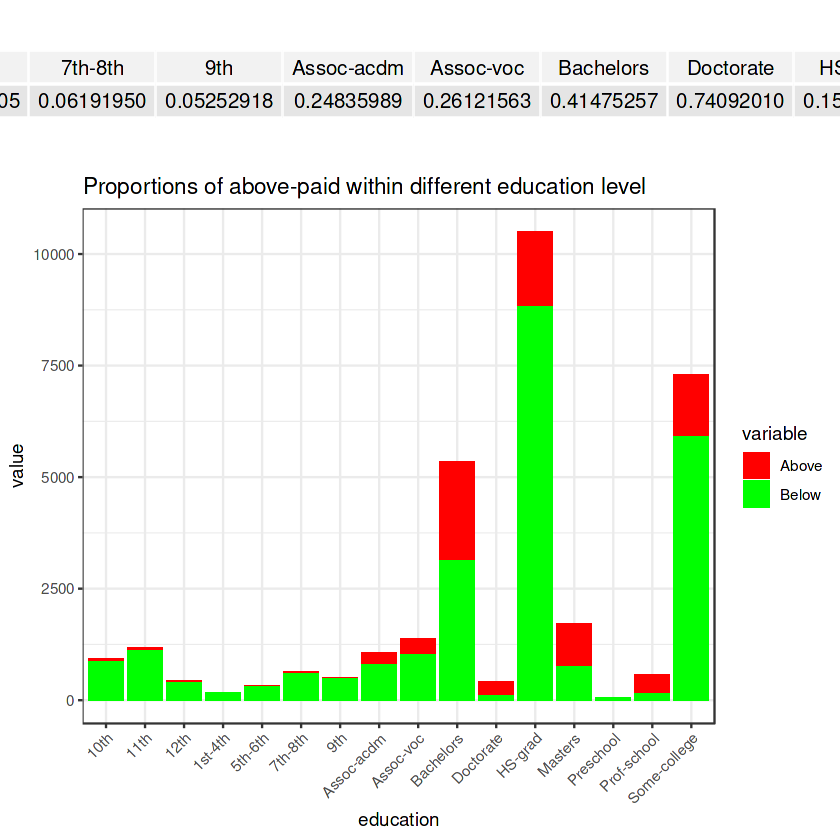

In [167]:
education<-sqldf('SELECT education, count(education) as Count 
                  ,sum(income) as Above from df group by education')
education$Below<-education$Count-education$Above
table<-data.frame(Class=education$education, Proportion=education$Above/education$Count)
education<-education[,c(1,3,4)]
edu<-melt(education,id.vars = 'education')
gg<-ggplot(edu,aes(x=education,y=value,fill=variable))+geom_bar(stat = 'identity',position = 'stack')+theme_bw()+scale_fill_manual(values = c('red','green'))+theme(axis.text.x = element_text(angle = 45, hjust = 1))+ggtitle('Proportions of above-paid within different education level')
tbl <- tableGrob(t(table), rows=NULL)
grid.arrange(tbl, gg,
             nrow=2,
             as.table=TRUE,
             heights=c(1,4))

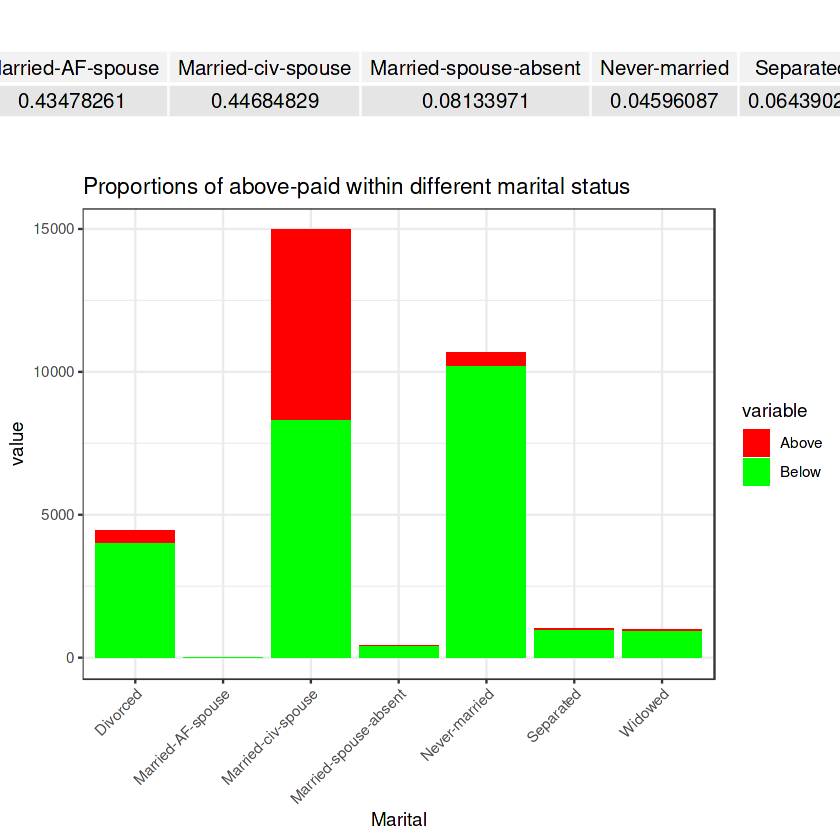

In [168]:
colnames(df)[6]<-'Marital'
marital<-sqldf('SELECT Marital, count(Marital) as Count 
                  ,sum(income) as Above from df group by Marital')
marital$Below<-marital$Count-marital$Above
table<-data.frame(Marital=marital$Marital, Proportion=marital$Above/marital$Count)
marital<-marital[,c(1,3,4)]
mar<-melt(marital,id.vars = 'Marital')
gg<-ggplot(mar,aes(x=Marital,y=value,fill=variable))+geom_bar(stat = 'identity',position = 'stack')+theme_bw()+scale_fill_manual(values = c('red','green'))+theme(axis.text.x = element_text(angle = 45, hjust = 1))+ggtitle('Proportions of above-paid within different marital status')
tbl <- tableGrob(t(table), rows=NULL)
grid.arrange(tbl, gg,
             nrow=2,
             as.table=TRUE,
             heights=c(1,4))

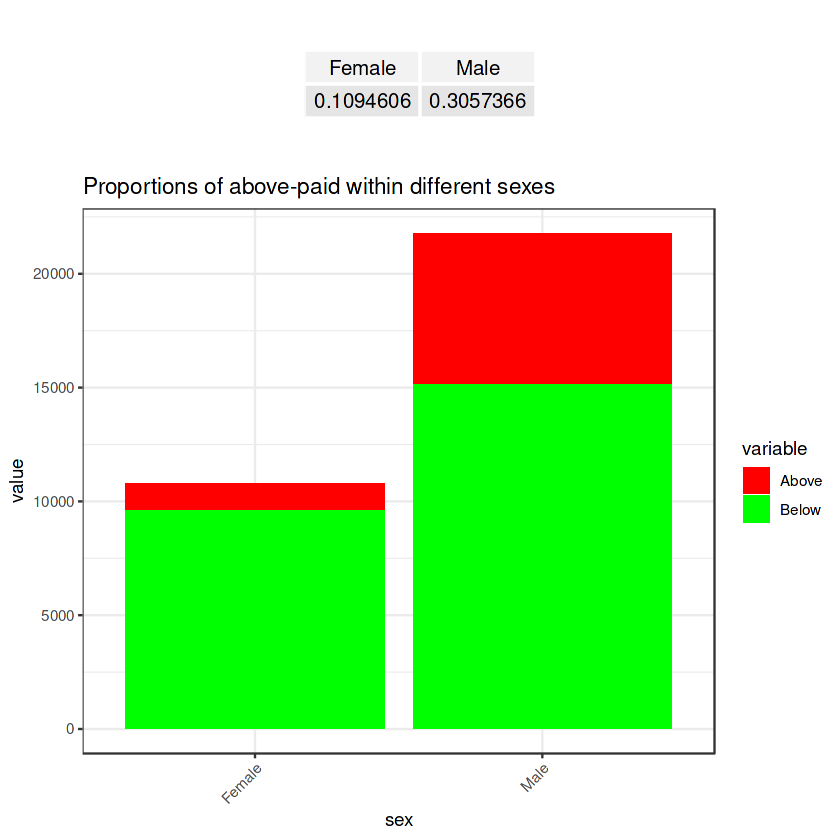

In [169]:
sex<-sqldf('SELECT sex, count(sex) as Count 
                  ,sum(income) as Above from df group by sex')
sex$Below<-sex$Count-sex$Above
table<-data.frame(sex=sex$sex, Proportion=sex$Above/sex$Count)
sex<-sex[,c(1,3,4)]
se<-melt(sex,id.vars = 'sex')
gg<-ggplot(se,aes(x=sex,y=value,fill=variable))+geom_bar(stat = 'identity',position = 'stack')+theme_bw()+scale_fill_manual(values = c('red','green'))+theme(axis.text.x = element_text(angle = 45, hjust = 1))+ggtitle('Proportions of above-paid within different sexes')
tbl <- tableGrob(t(table), rows=NULL)
grid.arrange(tbl, gg,
             nrow=2,
             as.table=TRUE,
             heights=c(1,4))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


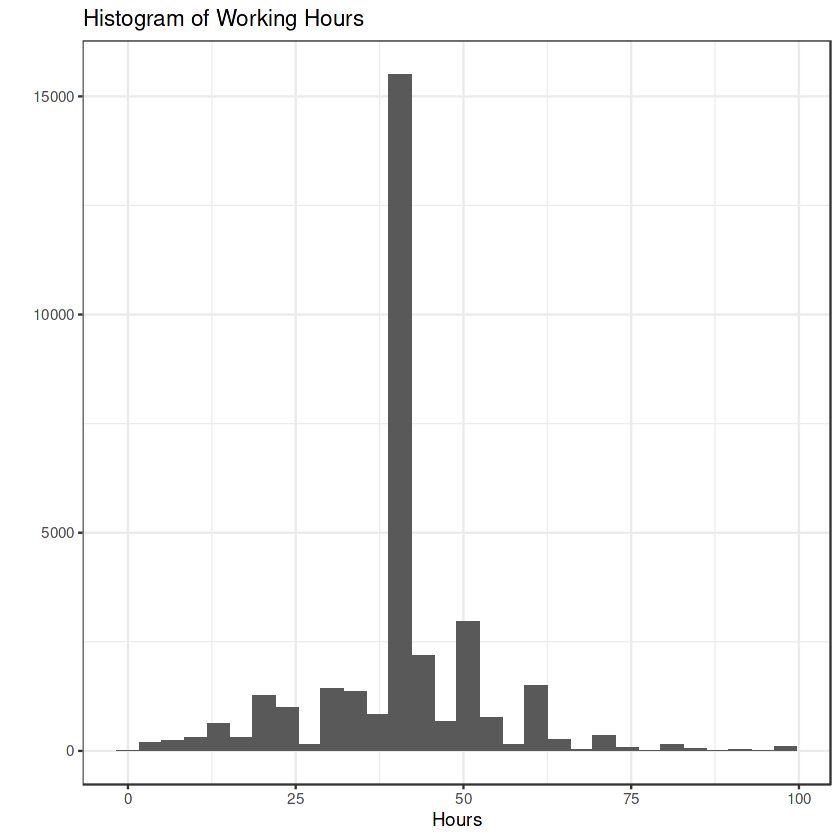

In [170]:
colnames(df)[13]<-'Hours'
gg<-qplot(Hours, data=df, geom="histogram")+theme_bw()+ggtitle('Histogram of Working Hours')
gg

In [171]:
df <- df[df$Hours <= 80, ]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


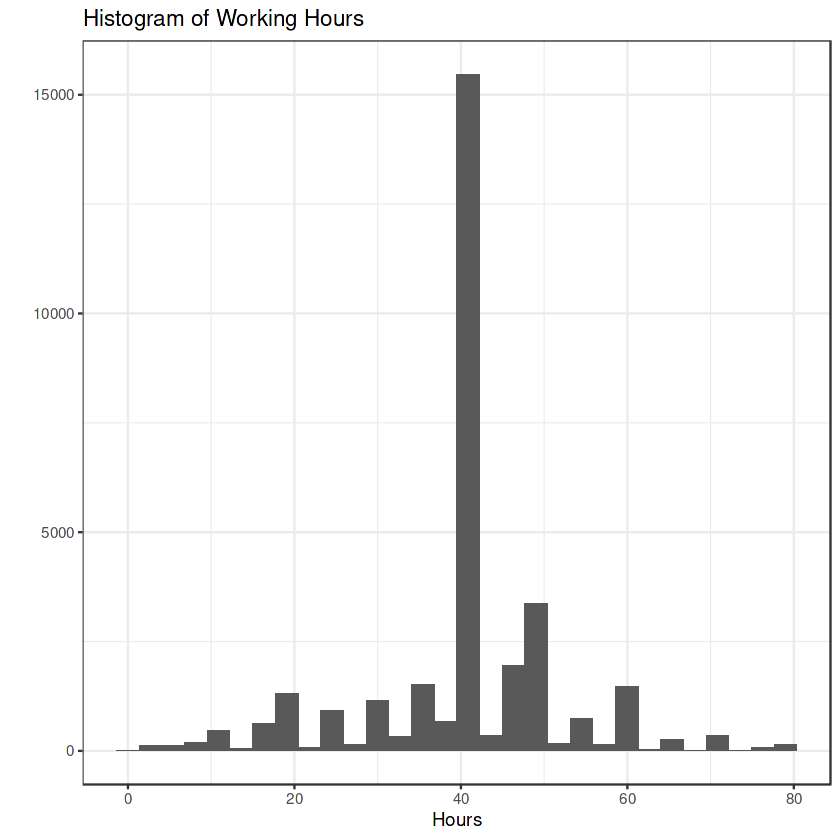

In [172]:
colnames(df)[13]<-'Hours'
gg<-qplot(Hours, data=df, geom="histogram")+theme_bw()+ggtitle('Histogram of Working Hours')
gg

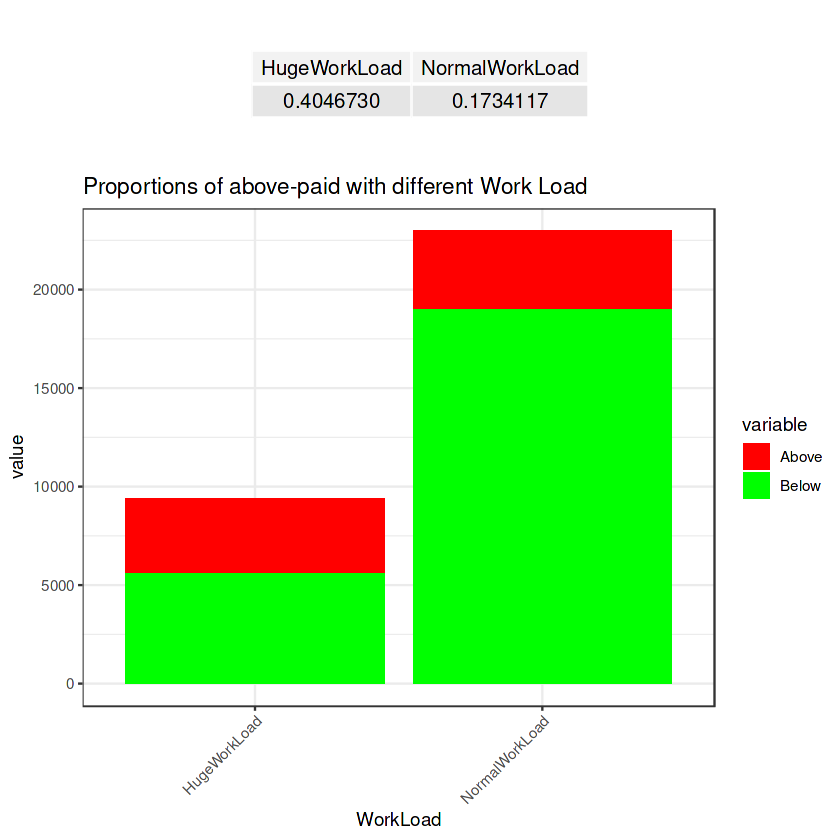

In [173]:
df2<-df
df2$HourJ<-ifelse(df2$Hours<=40,'NormalWorkLoad','HugeWorkLoad')
wl<-sqldf('SELECT HourJ as WorkLoad, count(HourJ) as Count, sum(income) as Above from df2 group by HourJ')
wl$Below<-wl$Count-wl$Above
Percentage<-wl$Above/wl$Count
wl<-wl[,c(1,3,4)]
wlt<-melt(wl,id.vars = 'WorkLoad')
wl<-cbind(wl,Percentage)
gg<-ggplot(wlt,aes(x=WorkLoad,y=value,fill=variable))+geom_bar(stat = 'identity',position = 'stack')+theme_bw()+scale_fill_manual(values = c('red','green'))+theme(axis.text.x = element_text(angle = 45, hjust = 1))+ggtitle('Proportions of above-paid with different Work Load')
tbl <- tableGrob(t(wl[,c(1,4)]), rows=NULL)
grid.arrange(tbl, gg,
             nrow=2,
             as.table=TRUE,
             heights=c(1,4))

In [174]:
# Data Transformation
# handling categorical values
colnames(df)[14]<-'Country'
df3<-df
cato<-c('education','Marital','occupation','relationship','race','sex','Country')
for(each in cato){
  df3[, each] <- as.factor(df3[, each])
  df3[,each]<-as.integer(df3[,each])
}

In [175]:
# creating a numeric representation of the "workclass" column in the data frame by replacing each original workclass value with its index in the unique set of workclass values
class<-unique(df$workclass)
for(i in 1:length(df3$age)){
  df3$workclass[i]<-which(class %in% df3$workclass[i])
}
df3$workclass<-as.numeric(df3$workclass)
head(df3)

,age,workclass,fnlwgt,education,education.num,Marital,occupation,relationship,race,sex,capital.gain,capital.loss,Hours,Country,income
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,90,1,77053,12,9,7,1,2,5,1,0,4356,40,40,0
2,82,2,132870,12,9,7,5,2,5,1,0,4356,18,40,0
3,66,1,186061,16,10,7,1,5,3,1,0,4356,40,40,0
4,54,2,140359,6,4,1,8,5,5,1,0,3900,40,40,0
5,41,2,264663,16,10,6,11,4,5,1,0,3900,40,40,0
6,34,2,216864,12,9,1,9,5,5,1,0,3770,45,40,0


In [46]:
# Data Mining
library(caret)
set.seed(1000)
df3$income<-as.factor(as.character(df3$income))
intrain<- createDataPartition(df3$income,p=0.7,list = FALSE)
train<- df3[intrain,]
test <- df3[-intrain,]

In [47]:
library(rpart)
library(rpart.plot)
treeFit<- rpart(income~.,data=train,method = 'class')
print(treeFit)

n= 22648 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 22648 5445 0 (0.759581420 0.240418580)  
   2) relationship>=1.5 13508 1346 0 (0.900355345 0.099644655)  
     4) capital.gain< 7073.5 13203 1051 0 (0.920396879 0.079603121)  
       8) relationship< 5.5 12172  612 0 (0.949720670 0.050279330) *
       9) relationship>=5.5 1031  439 0 (0.574199806 0.425800194)  
        18) education.num< 12.5 741  238 0 (0.678812416 0.321187584) *
        19) education.num>=12.5 290   89 1 (0.306896552 0.693103448) *
     5) capital.gain>=7073.5 305   10 1 (0.032786885 0.967213115) *
   3) relationship< 1.5 9140 4099 0 (0.551531729 0.448468271)  
     6) education.num< 12.5 6401 2122 0 (0.668489299 0.331510701)  
      12) capital.gain< 5095.5 6083 1807 0 (0.702942627 0.297057373) *
      13) capital.gain>=5095.5 318    3 1 (0.009433962 0.990566038) *
     7) education.num>=12.5 2739  762 1 (0.278203724 0.721796276) *


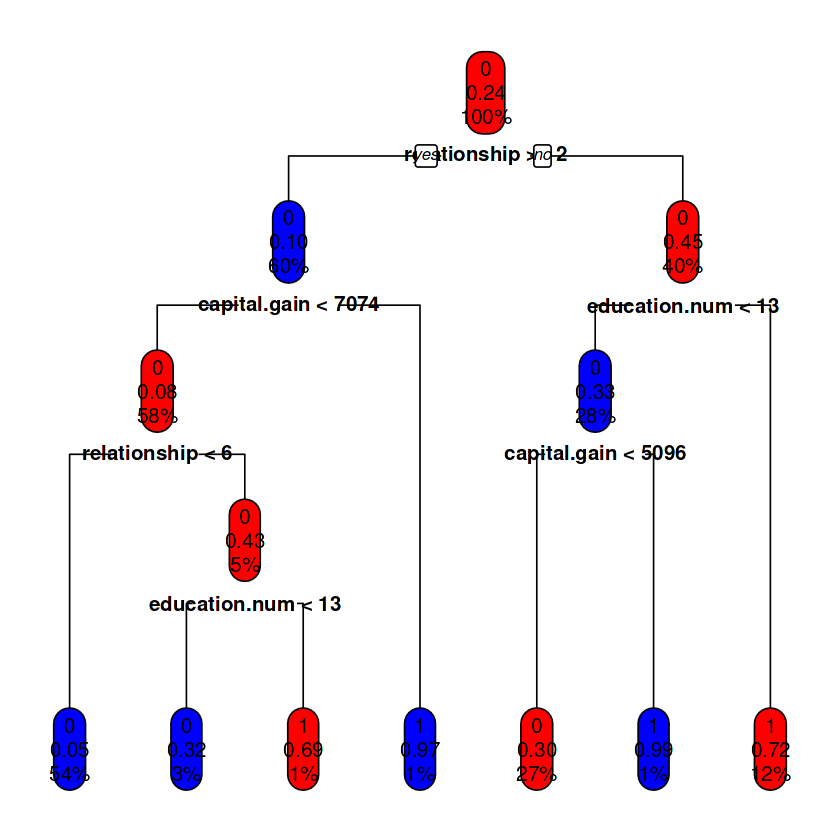

In [48]:
rpart.plot(treeFit, box.col=c("red", "blue"))

In [50]:
# Predictions on the test set
Prediction1 <- predict(treeFit, newdata = test[-15], type = 'class')

# Confusion Matrix and Accuracy
TreeAcu <- confusionMatrix(Prediction1, test$income)$overall[1]
cat("Accuracy:", TreeAcu, "\n")

# Additional Metrics
actual <- as.numeric(as.character(test$income))
predicted <- as.numeric(as.character(Prediction1))

# RMSE (Root Mean Squared Error)
rmse <- sqrt(mean((predicted - actual)^2))
cat("RMSE:", rmse, "\n")

# RSS (Residual Sum of Squares)
rss <- sum((predicted - actual)^2)
cat("RSS:", rss, "\n")

# Precision, Recall, and F-measure
precision <- confusionMatrix(Prediction1, test$income)$byClass["Pos Pred Value"]
recall <- confusionMatrix(Prediction1, test$income)$byClass["Sensitivity"]
f_measure <- (2 * precision * recall) / (precision + recall)
cat("Precision:", precision, "\n")
cat("Recall (Sensitivity):", recall, "\n")
cat("F-measure:", f_measure, "\n")

Accuracy: 0.8454405 
RMSE: 0.3931406 
RSS: 1500 
Precision: 0.8613983 
Recall (Sensitivity): 0.9492675 
F-measure: 0.9032008 


In [51]:
library(randomForest)
set.seed(32423)
rfFit<- randomForest(income~.,data= train)
print(rfFit)


Call:
 randomForest(formula = income ~ ., data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 13.6%
Confusion matrix:
      0    1 class.error
0 16186 1017   0.0591176
1  2062 3383   0.3786961


In [52]:

# Predictions on the test set
Prediction3 <- predict(rfFit, newdata = test[,-15], type = 'class')

# Confusion Matrix and Accuracy
rfAcu <- confusionMatrix(Prediction3, test$income)$overall[1]
cat("Accuracy:", rfAcu, "\n")

# Additional Metrics
actual_rf <- as.numeric(as.character(test$income))
predicted_rf <- as.numeric(as.character(Prediction3))

# RMSE (Root Mean Squared Error)
rmse_rf <- sqrt(mean((predicted_rf - actual_rf)^2))
cat("RMSE:", rmse_rf, "\n")

# RSS (Residual Sum of Squares)
rss_rf <- sum((predicted_rf - actual_rf)^2)
cat("RSS:", rss_rf, "\n")

# Precision, Recall, and F-measure
precision_rf <- confusionMatrix(Prediction3, test$income)$byClass["Pos Pred Value"]
recall_rf <- confusionMatrix(Prediction3, test$income)$byClass["Sensitivity"]
f_measure_rf <- (2 * precision_rf * recall_rf) / (precision_rf + recall_rf)
cat("Precision:", precision_rf, "\n")
cat("Recall (Sensitivity):", recall_rf, "\n")
cat("F-measure:", f_measure_rf, "\n")



Accuracy: 0.8673879 
RMSE: 0.3641594 
RSS: 1287 
Precision: 0.88852 
Recall (Sensitivity): 0.9438416 
F-measure: 0.9153457 


In [53]:
###################### 2nd Dataset ######################

In [147]:
df<-read.csv('/kaggle/input/apartmenthouse-for-rent/apartments_for_rent_classified_10K.csv', sep = ";", fileEncoding = "cp1252")
summary(df)

       id              category            title               body          
 Min.   :5.509e+09   Length:10000       Length:10000       Length:10000      
 1st Qu.:5.509e+09   Class :character   Class :character   Class :character  
 Median :5.669e+09   Mode  :character   Mode  :character   Mode  :character  
 Mean   :5.623e+09                                                           
 3rd Qu.:5.669e+09                                                           
 Max.   :5.669e+09                                                           
  amenities          bathrooms           bedrooms           currency        
 Length:10000       Length:10000       Length:10000       Length:10000      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                     

In [148]:
# Select the following columns

selected_columns <- c('bathrooms', 'bedrooms', 'square_feet', 'cityname', 'price')

df <- df[, selected_columns]

head(df)

,bathrooms,bedrooms,square_feet,cityname,price
,<chr>,<chr>,<int>,<chr>,<int>
1,null,0,101,Washington,790
2,null,1,106,Evansville,425
3,1,0,107,Arlington,1390
4,1,0,116,Seattle,925
5,null,0,125,Arlington,880
6,1,0,130,Manhattan,2475


In [149]:
# Handle missing values
df[df == "null"] <- NA

missing_values <- sapply(df, function(x) sum(is.na(x)))

print(missing_values)

  bathrooms    bedrooms square_feet    cityname       price 
         34           7           0          77           0 


In [150]:
df <- na.omit(df)
missing_values <- sapply(df, function(x) sum(is.na(x)))

print(missing_values)

  bathrooms    bedrooms square_feet    cityname       price 
          0           0           0           0           0 


In [151]:
# Data transformation
df$bathrooms <- as.numeric(as.character(df$bathrooms))

df$bedrooms <- as.numeric(as.character(df$bedrooms))

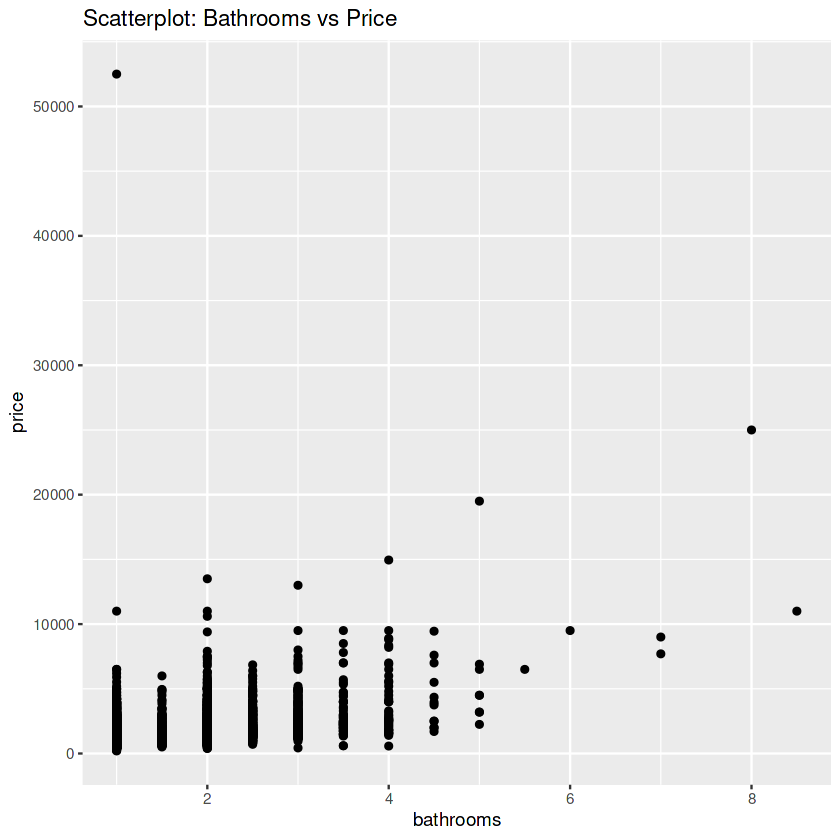

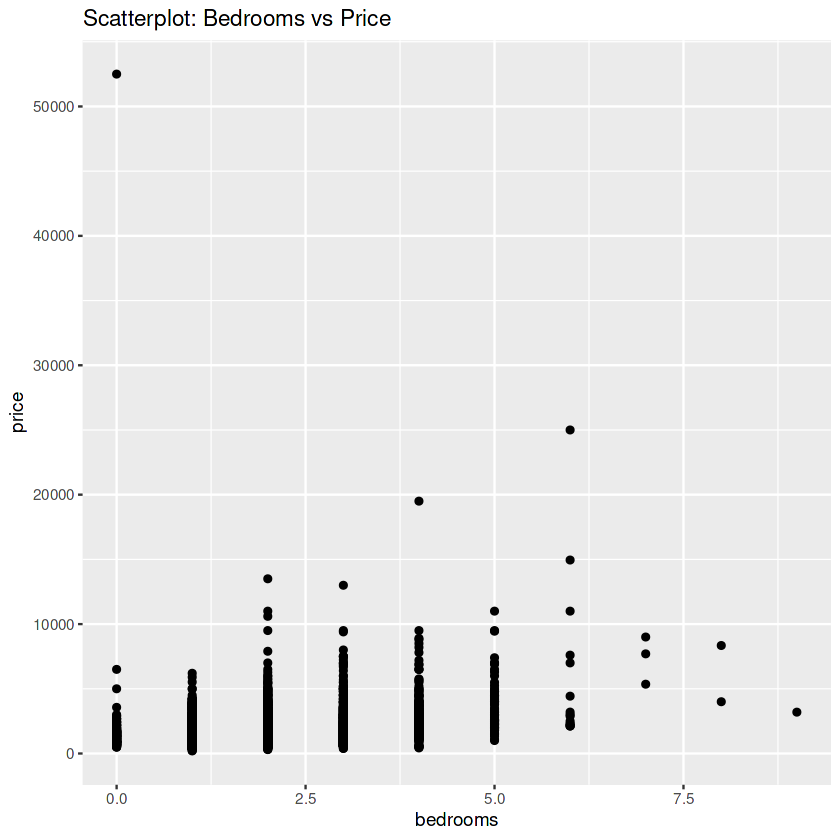

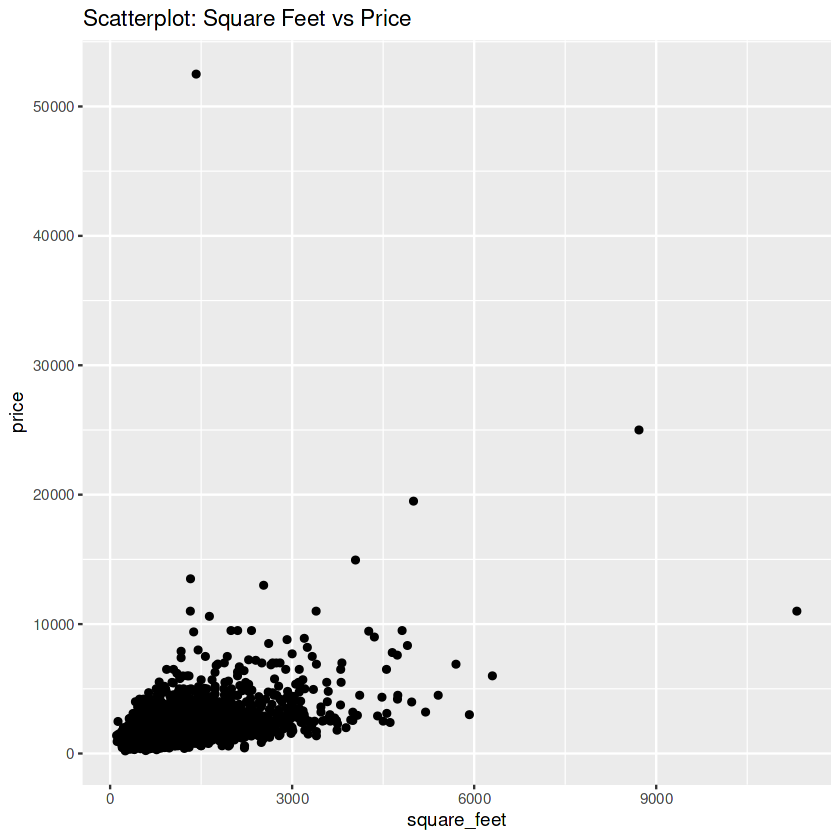

In [152]:
# Assuming df is your data frame
library(ggplot2)

# Scatterplot for bathrooms vs price
ggplot(df, aes(x = bathrooms, y = price)) +
  geom_point() +
  labs(title = "Scatterplot: Bathrooms vs Price")

# Scatterplot for bedrooms vs price
ggplot(df, aes(x = bedrooms, y = price)) +
  geom_point() +
  labs(title = "Scatterplot: Bedrooms vs Price")

# Scatterplot for square_feet vs price
ggplot(df, aes(x = square_feet, y = price)) +
  geom_point() +
  labs(title = "Scatterplot: Square Feet vs Price")


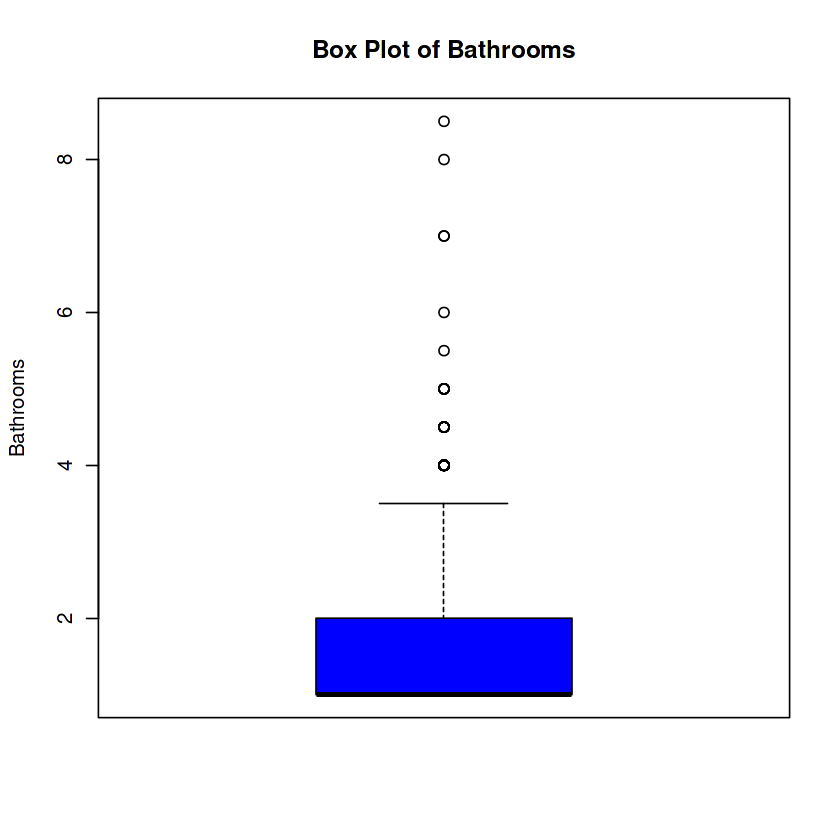

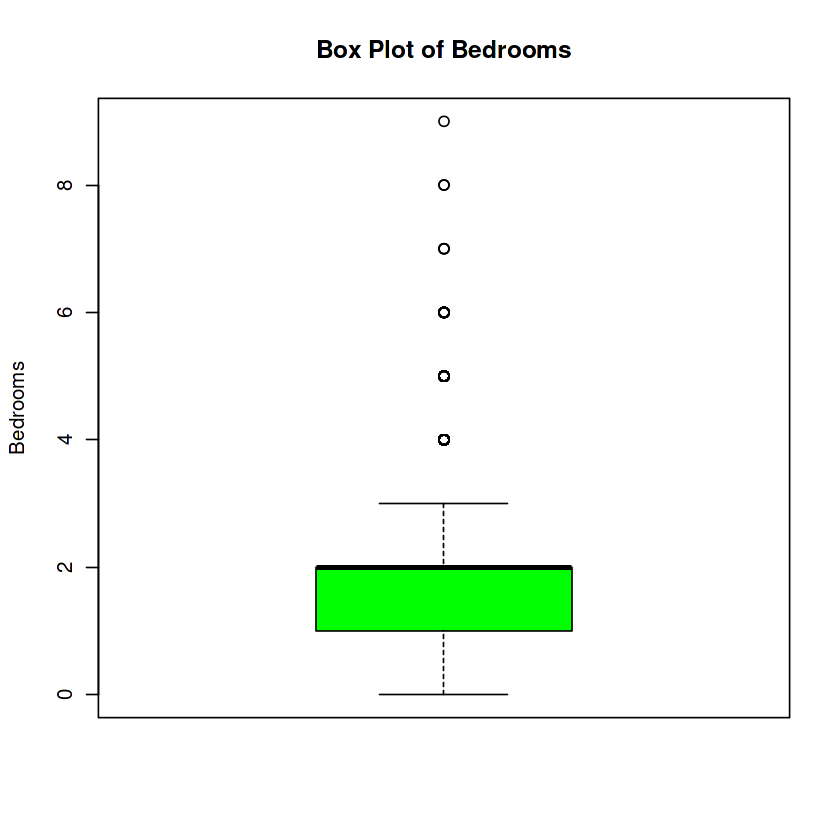

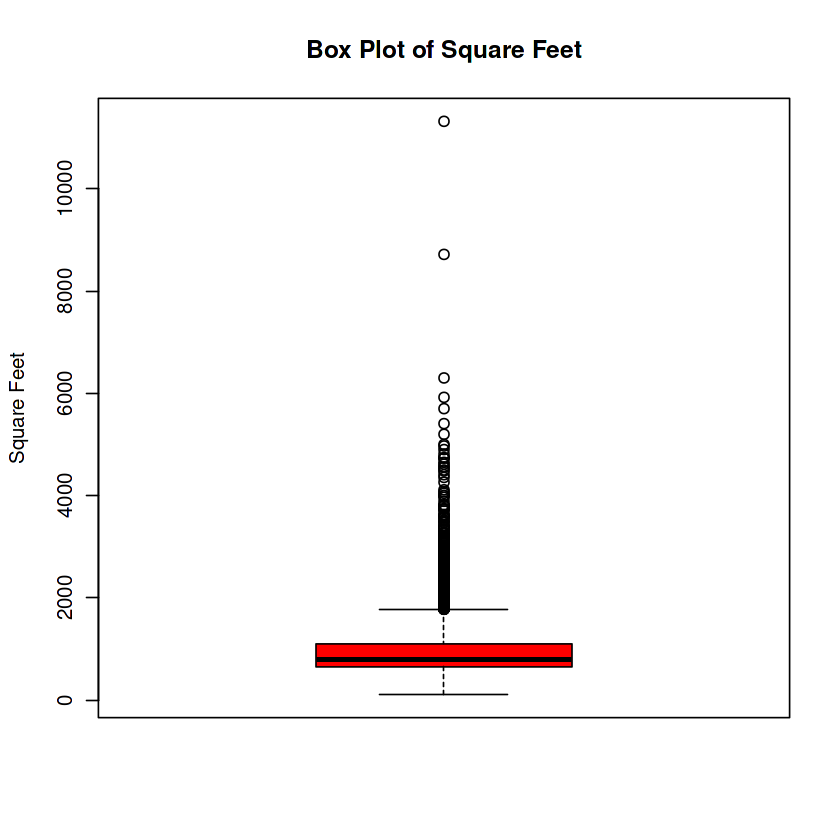

In [153]:
# Check for outliers

# Box plot for the 'bathrooms' column
boxplot(df$bathrooms, main="Box Plot of Bathrooms", ylab="Bathrooms", col="blue")

# Box plot for the 'bedrooms' column
boxplot(df$bedrooms, main="Box Plot of Bedrooms", ylab="Bedrooms", col="green")

# Box plot for the 'square_feet' column
boxplot(df$square_feet, main="Box Plot of Square Feet", ylab="Square Feet", col="red")

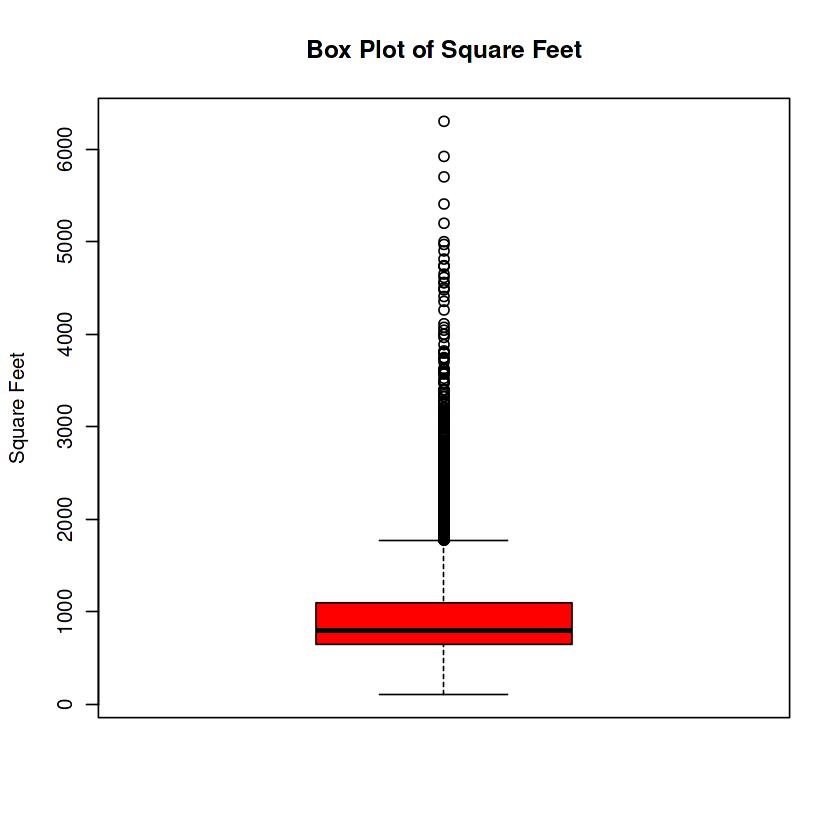

In [154]:
# Remove outlier
df <- df[df$square_feet <= 8000, ]

boxplot(df$square_feet, main="Box Plot of Square Feet", ylab="Square Feet", col="red")

In [155]:
# Feature engineering
df$price_per_sqft <- (df$price * 100000) / df$square_feet

head(df)

,bathrooms,bedrooms,square_feet,cityname,price,price_per_sqft
,<dbl>,<dbl>,<int>,<chr>,<int>,<dbl>
3,1,0,107,Arlington,1390,1299065.4
4,1,0,116,Seattle,925,797413.8
6,1,0,130,Manhattan,2475,1903846.2
9,1,0,138,San Francisco,1495,1083333.3
15,1,0,190,San Francisco,1695,892105.3
16,1,1,200,New Bern,1560,780000.0


In [156]:
# Define a function to remove outliers
remove_pps_outliers <- function(df) {
  df_out <- data.frame()
  
  # Loop through each unique 'cityname' group
  for (cityname in unique(df$cityname)) {
    subdf <- df[df$cityname == cityname, ]  # Subset the dataframe for the current 'cityname'
    
    m <- mean(subdf$price_per_sqft)  # Calculate mean
    st <- sd(subdf$price_per_sqft)   # Calculate standard deviation
    
    # Filter rows within 1 standard deviation from the mean
    reduced_df <- subdf[subdf$price_per_sqft > (m - st) & subdf$price_per_sqft <= (m + st), ]
    
    # Combine the reduced dataframe with the output dataframe
    df_out <- rbind(df_out, reduced_df)
  }
  
  return(df_out)
}

# Apply the remove_pps_outliers function to df2
df <- remove_pps_outliers(df)

In [157]:
df <- df[!is.na(df$cityname), ]
cat("Dimensions of df:", dim(df), "\n")

Dimensions of df: 6811 6 


In [158]:
# One hot encode top 10 cities and rest as other
top_cities <- names(sort(table(df$cityname), decreasing = TRUE))[1:10]
df$cityname[!(df$cityname %in% top_cities)] <- "Other"
encoded_cities <- model.matrix(~ cityname - 1, data = df)
df <- cbind(df, encoded_cities)
df <- df %>%
  select(-cityname)

In [159]:
# Data Mining
library(caret)
set.seed(1000)
intrain<- createDataPartition(df$price,p=0.7,list = FALSE)
train<- df[intrain,]
test <- df[-intrain,]

In [162]:
# Train the linear regression model
model <- lm(price ~ ., data=train)

# Make predictions on the test set
predictions <- predict(model, newdata=test)

# Evaluate model performance
mse <- mean((predictions - test$price)^2) # Mean Squared Error
r_squared <- summary(model)$r.squared    # R-squared

# Print the MSE and R-squared values
print(paste("MSE:", mse))
print(paste("R-squared:", r_squared))

# Additional Metrics
actual_lm <- test$price

# RMSE (Root Mean Squared Error)
rmse_lm <- sqrt(mean((predictions - actual_lm)^2))
cat("RMSE:", rmse_lm, "\n")

# RSS (Residual Sum of Squares)
rss_lm <- sum((predictions - actual_lm)^2)
cat("RSS:", rss_lm, "\n")

# F-measure is typically used in classification problems, and it might not be directly applicable to regression problems.

# MAPE (Mean Absolute Percentage Error) (Optional - for regression problems)
mape_lm <- mean(abs((actual_lm - predictions) / actual_lm)) * 100
cat("MAPE:", mape_lm, "%\n")

Warning message in predict.lm(model, newdata = test):
“prediction from a rank-deficient fit may be misleading”


[1] "MSE: 119839.231114896"
[1] "R-squared: 0.827289141792265"
RMSE: 346.178 
RSS: 244591871 
MAPE: 12.40957 %


In [ ]:
###################### 3rd Dataset ######################

In [123]:
df <- read.csv("/kaggle/input/bankmarketingdataset/bank.csv")
summary(df)

      age            job              marital           education        
 Min.   :18.00   Length:11162       Length:11162       Length:11162      
 1st Qu.:32.00   Class :character   Class :character   Class :character  
 Median :39.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :41.23                                                           
 3rd Qu.:49.00                                                           
 Max.   :95.00                                                           
   default             balance        housing              loan          
 Length:11162       Min.   :-6847   Length:11162       Length:11162      
 Class :character   1st Qu.:  122   Class :character   Class :character  
 Mode  :character   Median :  550   Mode  :character   Mode  :character  
                    Mean   : 1529                                        
                    3rd Qu.: 1708                                        
                    Max.   :81204     

In [126]:
selected_columns <- c("job", "marital", "education", "default", "balance", "housing", "loan", "duration", "campaign", "pdays", "previous", "poutcome", "deposit")

df <- df[, selected_columns]

head(df)

,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,admin.,married,secondary,no,2343,yes,no,1042,1,-1,0,unknown,yes
2,admin.,married,secondary,no,45,no,no,1467,1,-1,0,unknown,yes
3,technician,married,secondary,no,1270,yes,no,1389,1,-1,0,unknown,yes
4,services,married,secondary,no,2476,yes,no,579,1,-1,0,unknown,yes
5,admin.,married,tertiary,no,184,no,no,673,2,-1,0,unknown,yes
6,management,single,tertiary,no,0,yes,yes,562,2,-1,0,unknown,yes


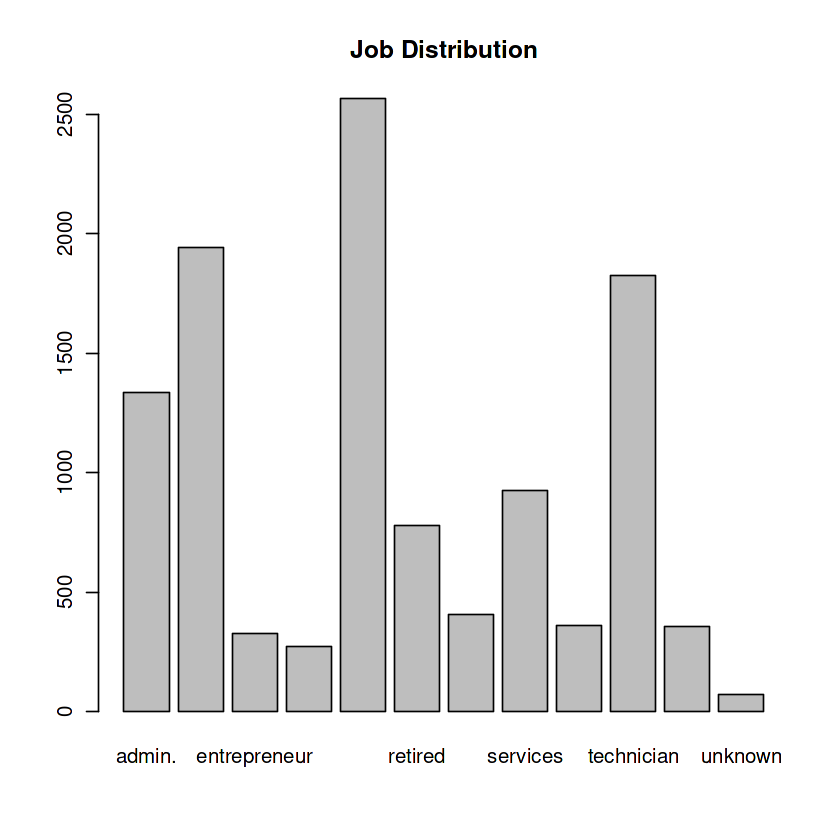

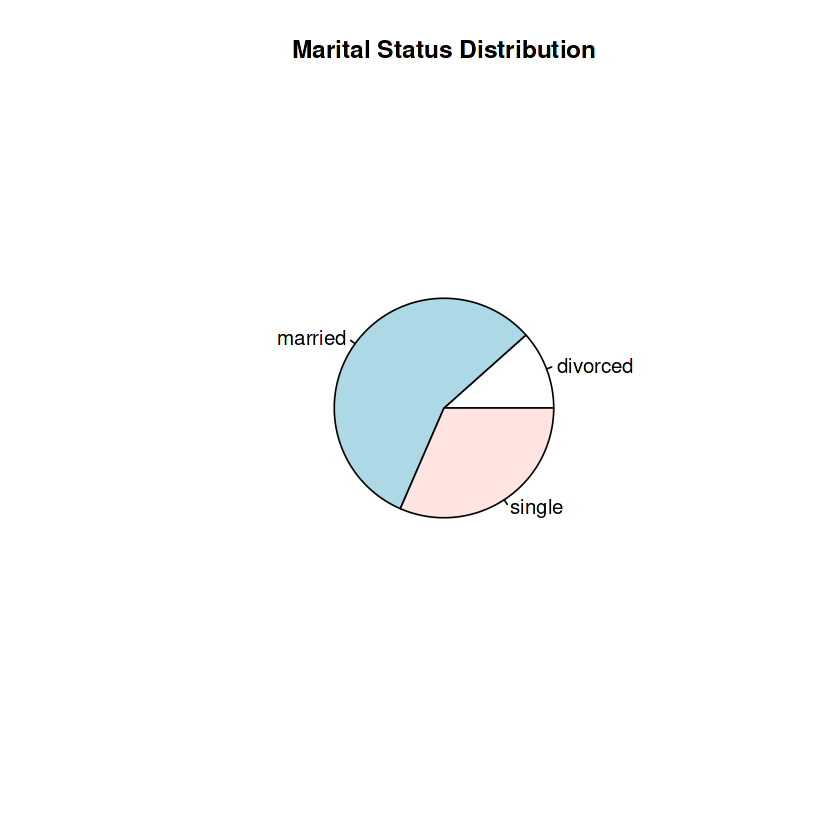

Warning message in dotchart(table(df$education), main = "Education Distribution"):
“'x' is neither a vector nor a matrix: using as.numeric(x)”


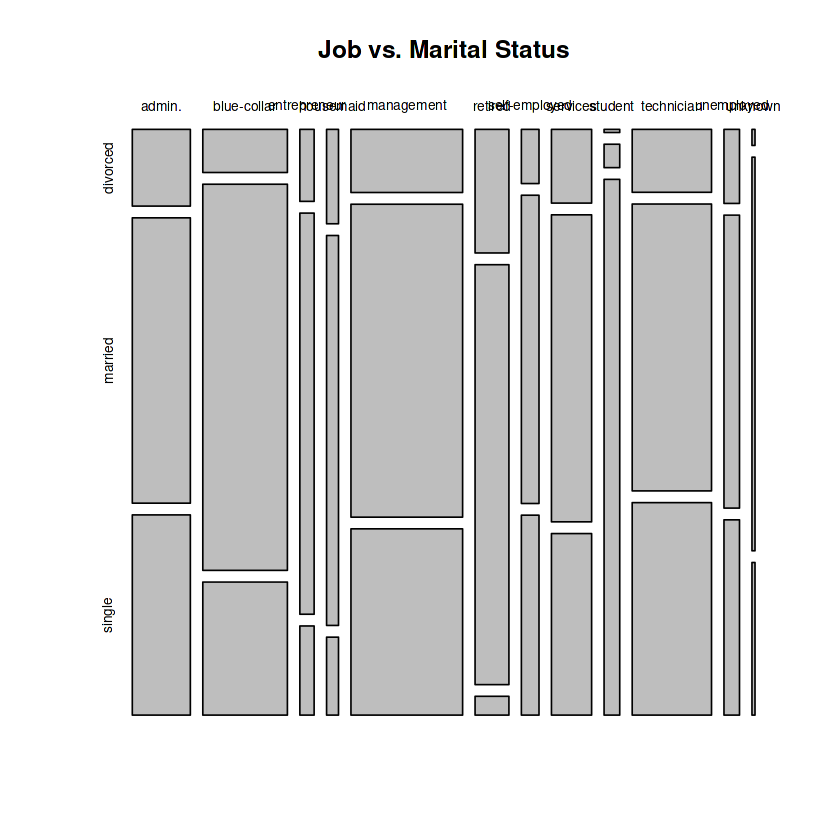

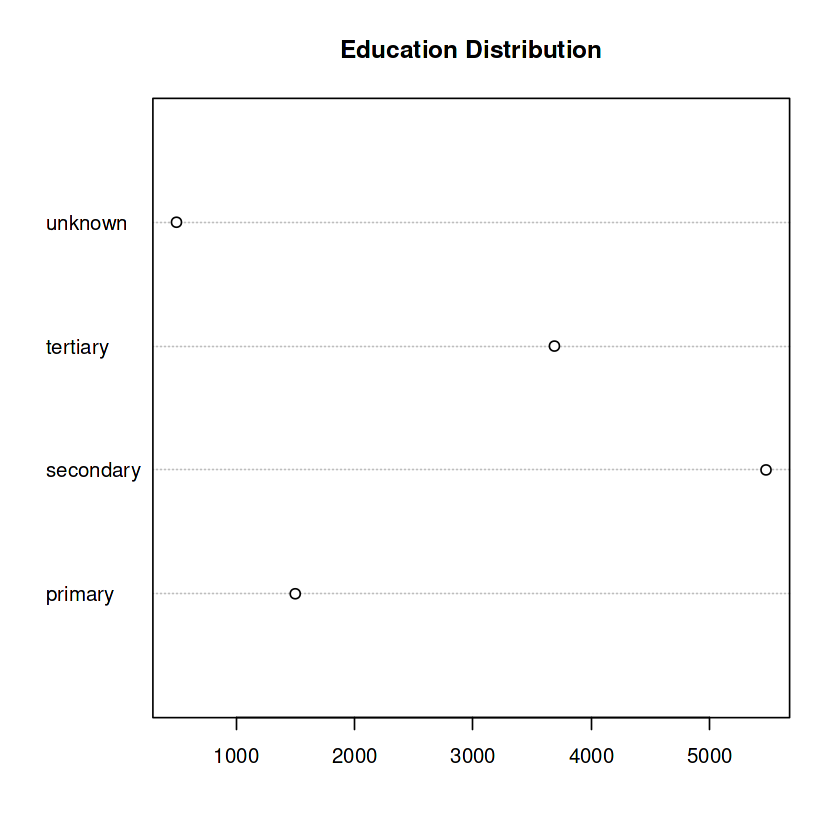

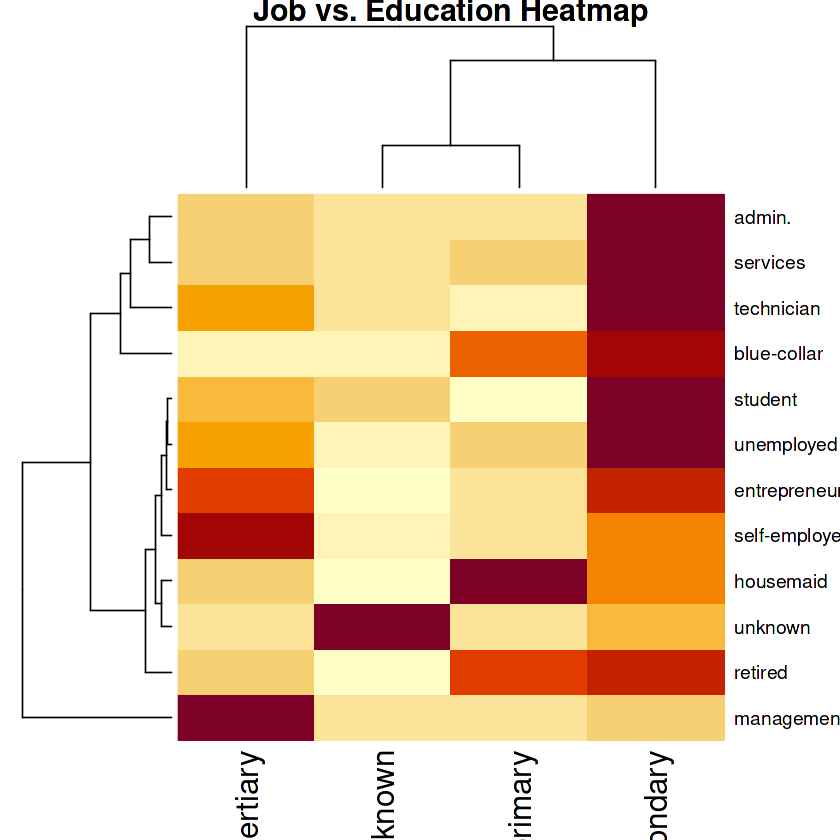

In [127]:
# EDA
barplot(table(df$job), main="Job Distribution")
pie(table(df$marital), main="Marital Status Distribution")
library(ggplot2)
mosaicplot(table(df$job, df$marital), main="Job vs. Marital Status")
dotchart(table(df$education), main="Education Distribution")
heatmap(table(df$job, df$education), main="Job vs. Education Heatmap")

In [128]:
# Handle missing
df[df == "null"] <- NA

missing_values <- sapply(df, function(x) sum(is.na(x)))

print(missing_values)

      job   marital education   default   balance   housing      loan  duration 
        0         0         0         0         0         0         0         0 
 campaign     pdays  previous  poutcome   deposit 
        0         0         0         0         0 


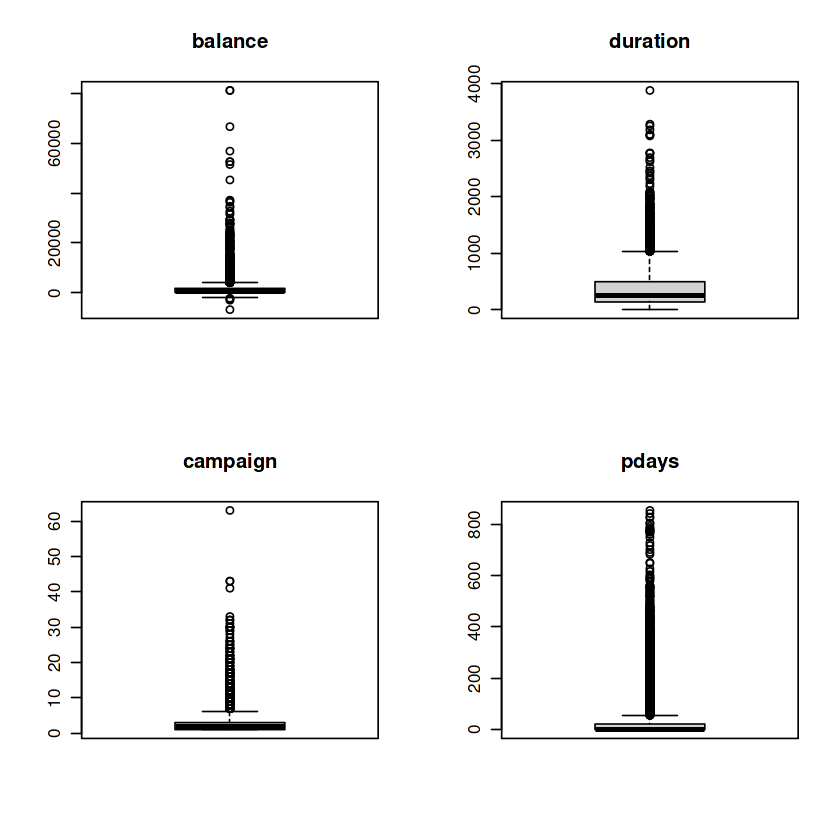

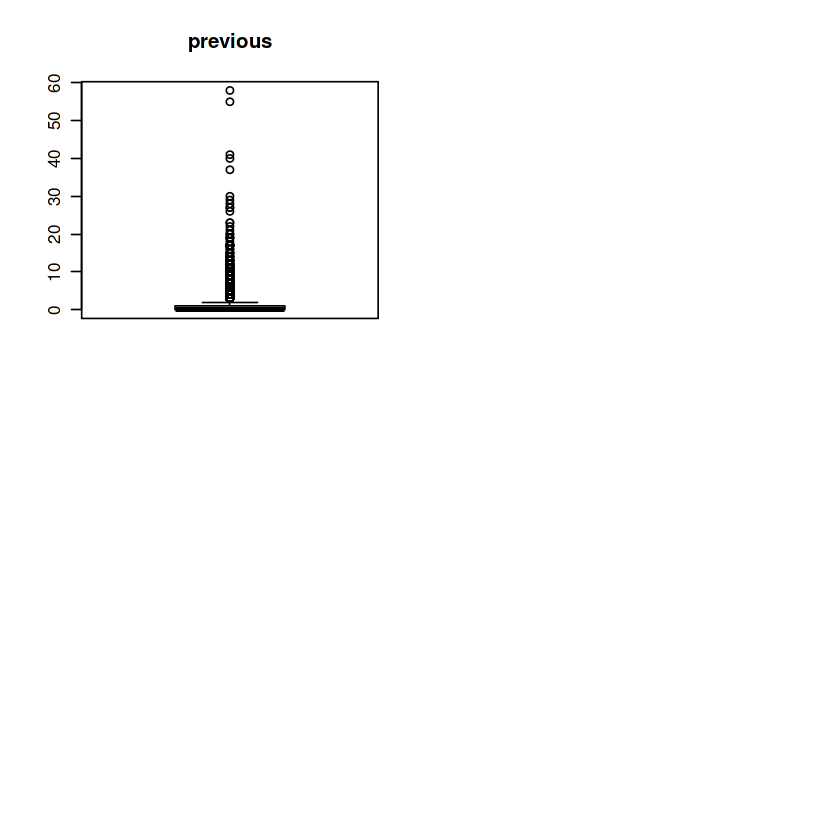

In [129]:
# Handle outliers
numeric_columns <- df[sapply(df, is.numeric)]

# Create a boxplot for each numeric column
par(mfrow=c(2, 2))  # Arrange the plots in a 2x2 grid (adjust as needed)

for (col in names(numeric_columns)) {
  boxplot(numeric_columns[[col]], main=col)
}

# Reset the plotting layout
par(mfrow=c(1, 1))

In [130]:
# Remove rows with balance > 60,000 and duration > 3,000
df <- df[df$balance <= 60000 & df$duration <= 3000, ]

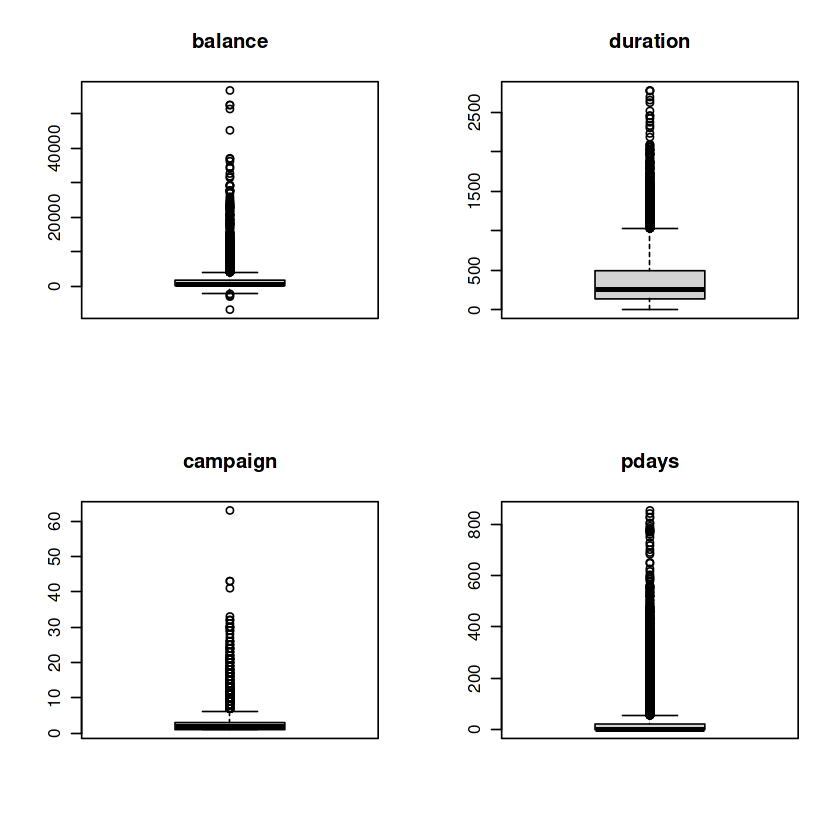

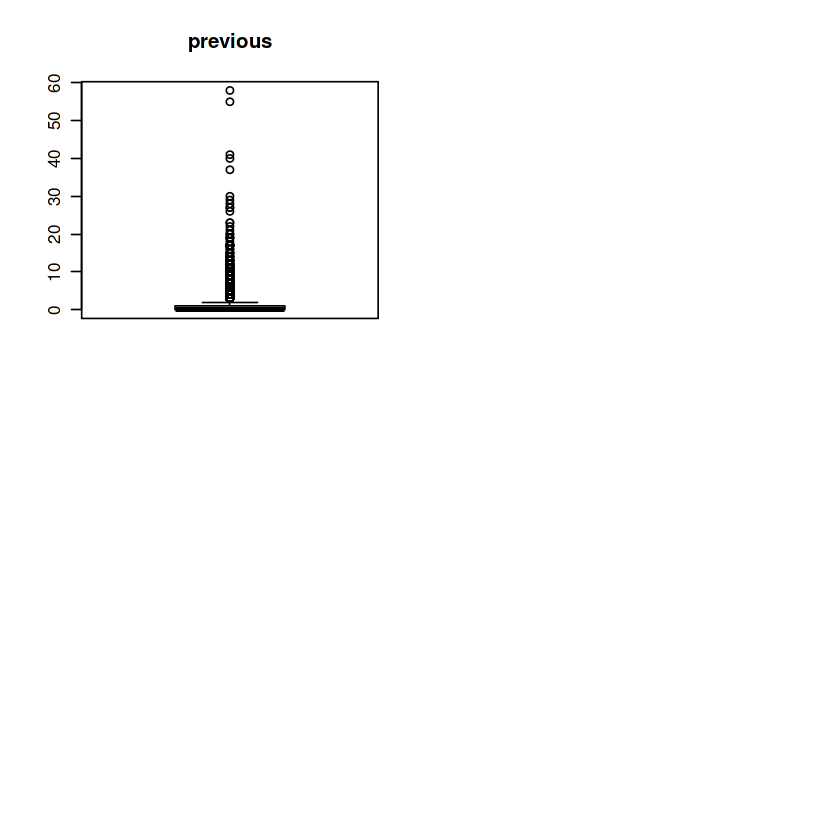

In [131]:
# Handle outliers
numeric_columns <- df[sapply(df, is.numeric)]

# Create a boxplot for each numeric column
par(mfrow=c(2, 2))  # Arrange the plots in a 2x2 grid (adjust as needed)

for (col in names(numeric_columns)) {
  boxplot(numeric_columns[[col]], main=col)
}

# Reset the plotting layout
par(mfrow=c(1, 1))

In [132]:
# Identify character-type columns
char_columns <- sapply(df, is.character)

# Apply one-hot encoding to character columns
df_one_hot <- model.matrix(~ . - 1, data = df[, char_columns])

# Combine the one-hot encoded columns with the original numeric columns
df_encoded <- cbind(df[!char_columns], df_one_hot)

# Get the names of one-hot encoded columns
one_hot_column_names <- colnames(df_one_hot)

# Assign column names to the one-hot encoded columns
colnames(df_encoded)[(ncol(df_encoded) - length(one_hot_column_names) + 1):ncol(df_encoded)] <- one_hot_column_names

# Display the first few rows of the encoded dataframe
head(df_encoded)


,balance,duration,campaign,pdays,previous,jobadmin.,jobblue-collar,jobentrepreneur,jobhousemaid,jobmanagement,⋯,educationsecondary,educationtertiary,educationunknown,defaultyes,housingyes,loanyes,poutcomeother,poutcomesuccess,poutcomeunknown,deposityes
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2343,1042,1,-1,0,1,0,0,0,0,⋯,1,0,0,0,1,0,0,0,1,1
2,45,1467,1,-1,0,1,0,0,0,0,⋯,1,0,0,0,0,0,0,0,1,1
3,1270,1389,1,-1,0,0,0,0,0,0,⋯,1,0,0,0,1,0,0,0,1,1
4,2476,579,1,-1,0,0,0,0,0,0,⋯,1,0,0,0,1,0,0,0,1,1
5,184,673,2,-1,0,1,0,0,0,0,⋯,0,1,0,0,0,0,0,0,1,1
6,0,562,2,-1,0,0,0,0,0,1,⋯,0,1,0,0,1,1,0,0,1,1


In [136]:
library(caret)
set.seed(1000)
intrain<- createDataPartition(df_encoded$deposityes,p=0.7,list = FALSE)
train<- df_encoded[intrain,]
test <- df_encoded[-intrain,]

train$deposityes <- factor(train$deposityes)
test$deposityes <- factor(test$deposityes)

In [140]:
library(e1071)

# Train a Support Vector Machine (SVM) model
svm_model <- svm(deposityes ~ ., data = train)

# Predict using the trained model
svm_predictions <- predict(svm_model, newdata = test)

# Evaluate the SVM model
svm_confusion_matrix <- confusionMatrix(svm_predictions, test$deposityes)
svm_accuracy <- svm_confusion_matrix$overall["Accuracy"]
svm_f1_score <- svm_confusion_matrix$byClass["F1"]

# Additional Metrics
actual_svm <- as.numeric(as.character(test$deposityes))
predicted_svm <- as.numeric(as.character(svm_predictions))

# RMSE (Root Mean Squared Error) - Optional for classification problems

# RSS (Residual Sum of Squares) - Optional for classification problems

# Precision and Recall
precision_svm <- svm_confusion_matrix$byClass["Pos Pred Value"]
recall_svm <- svm_confusion_matrix$byClass["Sensitivity"]

cat("Accuracy:", svm_accuracy, "\n")
cat("F1-Score:", svm_f1_score, "\n")
cat("Precision:", precision_svm, "\n")
cat("Recall (Sensitivity):", recall_svm, "\n")

Accuracy: 0.7958146 
F1-Score: 0.8095902 
Precision: 0.7964893 
Recall (Sensitivity): 0.8231293 


In [141]:
library(stats)
library(MLmetrics)

train_features <- train[, -which(names(train) == "deposityes")]
train_target <- train$deposityes

test_features <- test[, -which(names(test) == "deposityes")]
test_target <- test$deposityes

# Train the Logistic Regression model
lr_model <- glm(train_target ~ ., data = train_features, family = binomial())

# Make predictions on the test data
# Predicting probability of class '1' and converting it to class labels
lr_predictions <- ifelse(predict(lr_model, newdata = test_features, type = "response") > 0.5, 1, 0)

# Calculate accuracy
accuracy <- sum(lr_predictions == test_target) / length(test_target)

# Calculate F1-score
f1_score <- F1_Score(y_pred = lr_predictions, y_true = test_target, positive = "1")

# Calculate Precision, Recall
precision <- Precision(y_pred = lr_predictions, y_true = test_target, positive = "1")
recall <- Recall(y_pred = lr_predictions, y_true = test_target, positive = "1")

cat("Accuracy:", accuracy, "\n")
cat("F1-Score:", f1_score, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


Accuracy: 0.7922272 
F1-Score: 0.7679466 
Precision: 0.8132956 
Recall: 0.7273877 
